<a href="https://colab.research.google.com/github/MarcosNobre33/TO-DO-LIST/blob/main/K_NN_(K_NEAREST_NEIGHBORS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dados preparados e padronizados com sucesso.

Número de Vizinhos (K) selecionado: 5
Acurácia do k-NN (K=5): 0.9111

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.79      1.00      0.88        15
           2       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45



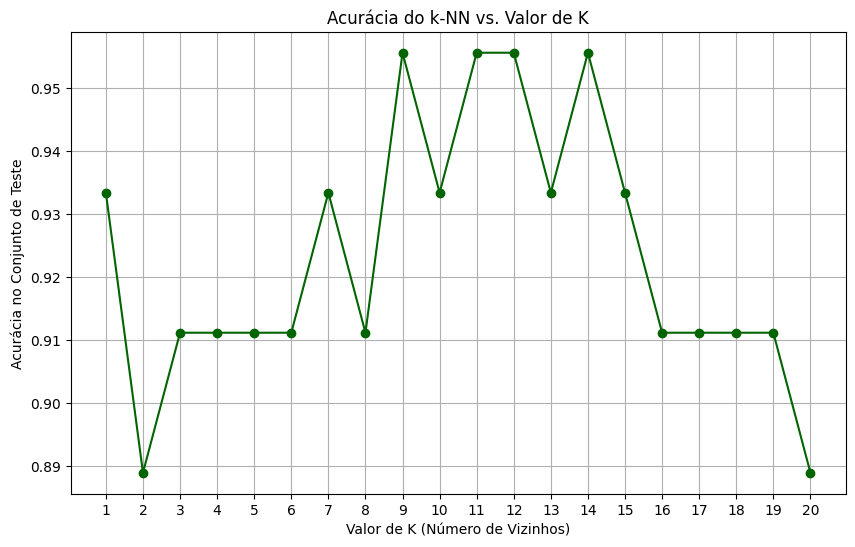


O Melhor K Encontrado (maior acurácia) é: 9 (Acurácia: 0.9556)


In [1]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report



# Carregar o Iris Dataset (exemplo clássico de classificação)

iris = load_iris()

X = iris.data    # Variáveis preditoras

y = iris.target  # Variável alvo (labels)



# Dividir os dados em conjuntos de treino e teste

X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=0.3, random_state=42, stratify=y

)



# --- Padronização (Escalonamento) dos Dados ---

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)



print("Dados preparados e padronizados com sucesso.")



## --- Modelo Não Paramétrico: k-NN ---

K = 5

print(f"\nNúmero de Vizinhos (K) selecionado: {K}")



# Instanciar o classificador k-NN

knn_classifier = KNeighborsClassifier(n_neighbors=K)



# Treinar o modelo

knn_classifier.fit(X_train_scaled, y_train)



# Fazer predições no conjunto de teste

y_pred_knn = knn_classifier.predict(X_test_scaled)



# Avaliar o desempenho

accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f"Acurácia do k-NN (K={K}): {accuracy_knn:.4f}")

print("\nRelatório de Classificação:")

print(classification_report(y_test, y_pred_knn))



# --- Análise e Visualização para Encontrar o K Ótimo ---



accuracy_scores = []

k_range = range(1, 21)



for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train_scaled, y_train)

    y_pred_k = knn.predict(X_test_scaled)

    accuracy_scores.append(accuracy_score(y_test, y_pred_k))



# Plotar a acurácia em função de K

plt.figure(figsize=(10, 6))

plt.plot(k_range, accuracy_scores, marker='o', linestyle='-', color='darkgreen')

plt.title('Acurácia do k-NN vs. Valor de K')

plt.xlabel('Valor de K (Número de Vizinhos)')

plt.ylabel('Acurácia no Conjunto de Teste')

plt.xticks(k_range)

plt.grid(True)

plt.show()



best_k = k_range[np.argmax(accuracy_scores)]

best_accuracy = np.max(accuracy_scores)

print(f"\nO Melhor K Encontrado (maior acurácia) é: {best_k} (Acurácia: {best_accuracy:.4f})")